# Cleaning and Preparing Data
***

## Import Required Modules

In [1]:
import os, types

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import cm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
pd.options.plotting.backend = "matplotlib"
pio.templates.default ='plotly_dark'

import warnings
from collections import Counter
import datetime as dt
import json 

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
#Font Dicts

fontdict = dict(family = 'Courier New Bold', color='lightblue', size=18)
fontdict1 = dict(family = 'Courier New Bold', color='lightblue', size=25)
fontdict2 = dict(family = 'Courier New Bold', color='lightblue', size=35)
fontdict3= dict(family = 'Courier New Bold', color='lightblue', size=15)

# Load The Data

In [3]:
print('Begin Loading Dataframe')
print()

my_file = "data/MX_youtube_trending_data.csv"

mexico = pd.read_csv(my_file)
print('Mexico Loaded')


my_file = "data/KR_youtube_trending_data.csv"

southkorea = pd.read_csv(my_file)
print('South Korea Loaded')


my_file = "data/JP_youtube_trending_data.csv"

japan = pd.read_csv(my_file)
print('Japan Loaded')


my_file = "data/IN_youtube_trending_data.csv"

india = pd.read_csv(my_file)
print('India Loaded')


my_file = "data/FR_youtube_trending_data.csv"

france= pd.read_csv(my_file)
print('France Loaded')



my_file = "data/DE_youtube_trending_data.csv"

germany = pd.read_csv(my_file)
print('Germany Loaded')


my_file = "data/US_youtube_trending_data.csv"

usa = pd.read_csv(my_file)
print('USA Loaded')


my_file = "data/RU_youtube_trending_data.csv"

russia = pd.read_csv(my_file)
print('Russia Loaded')



my_file = "data/BR_youtube_trending_data.csv"

brazil = pd.read_csv(my_file)
print('Brazil Loaded')


my_file = "data/CA_youtube_trending_data.csv"

canada = pd.read_csv(my_file)
print('Canada Loaded')


my_file = "data/GB_youtube_trending_data.csv"

uk = pd.read_csv(my_file)
print('UK Loaded')
print()
print('Done!')

Begin Loading Dataframe

Mexico Loaded
South Korea Loaded
Japan Loaded
India Loaded
France Loaded
Germany Loaded
USA Loaded
Russia Loaded
Brazil Loaded
Canada Loaded
UK Loaded

Done!


Load Category Data

In [4]:
print("Loading Video Categories")
my_file = "data/video_categories.csv"

cat_df = pd.read_csv(my_file)

Loading Video Categories


Now Let's Add Country Name to Dataframe before Concatenating Frames

In [5]:
print('Adding Country Column \n')

india['country'] = 'India'
brazil['country'] = 'Brazil'  
canada['country'] = 'Canada' 
germany['country'] = 'Germany'
france['country'] = 'France'
russia['country'] = 'Russia'
uk['country'] = 'United Kingdom'
japan['country'] = 'Japan'
mexico['country'] = 'Mexico' 
usa['country'] = 'United States'  
southkorea['country'] = 'South Korea' 

print('Merging Dataframes into MasterFrame')
frames = [india,brazil,canada,germany,france,russia,uk,japan, mexico, usa, southkorea]
df= pd.concat(frames)
print()
print('Merged Complete')

Adding Country Column 

Merging Dataframes into MasterFrame

Merged Complete


#### Basic Research On The Data

In [6]:
print('Doing Basic Research On Dataframe.','\n')
def data_research(data, data_name='data', un=False):
    print(f'Examining "{data_name}"')
    
    #basic
    print(df.info())
    #head
    print()
    display(data.head(2))
    #display(data.info())
    display(data.describe())
    #display(data.columns)
    print(df.columns)
    print()
    #duplicates
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print('There are no duplicated entries.')
    else:
        print(f'There are {duplicates} duplicates.')
        
    #missing
    print('Missing Values')
    data_missing = pd.DataFrame(data.isnull().sum())
    if data_missing[0].sum() > 0:
        print(data_missing)
    else:
        print(f'There are no missing values in "{data_name}".')
    
    
data_research(df, data_name='Youtube Trending Videos')


Doing Basic Research On Dataframe. 

Examining "Youtube Trending Videos"
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166693 entries, 0 to 103953
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   video_id           1166693 non-null  object
 1   title              1166693 non-null  object
 2   publishedAt        1166693 non-null  object
 3   channelId          1166693 non-null  object
 4   channelTitle       1166692 non-null  object
 5   categoryId         1166693 non-null  int64 
 6   trending_date      1166693 non-null  object
 7   tags               1166693 non-null  object
 8   view_count         1166693 non-null  int64 
 9   likes              1166693 non-null  int64 
 10  dislikes           1166693 non-null  int64 
 11  comment_count      1166693 non-null  int64 
 12  thumbnail_link     1166693 non-null  object
 13  comments_disabled  1166693 non-null  bool  
 14  ratings_disabled   1166693

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,India
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,India


,categoryId,view_count,likes,dislikes,comment_count
count,1.166693e+06,1.166693e+06,1.166693e+06,1.166693e+06,1.166693e+06
mean,1.927962e+01,1.916252e+06,1.119995e+05,2.304182e+03,9.748335e+03
std,6.754882e+00,6.129621e+06,4.001866e+05,3.501734e+04,9.561949e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+01,2.387910e+05,8.384000e+03,1.240000e+02,5.520000e+02
50%,2.200000e+01,5.846210e+05,2.471300e+04,3.920000e+02,1.533000e+03
75%,2.400000e+01,1.506116e+06,7.826700e+04,1.277000e+03,4.529000e+03
max,2.900000e+01,2.963142e+08,1.646425e+07,1.234147e+07,6.939302e+06


Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country'],
      dtype='object')

There are no duplicated entries.
Missing Values
                       0
video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           1
categoryId             0
trending_date          0
tags                   0
view_count             0
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description        31852
country                0


In [7]:
# The columnn names are a little all over the place so will clean those up real quick 
def clean_header(df):
    """
    This functions removes weird characters and spaces from column names, while keeping everything lower case
    """
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    print(df.columns)
    
clean_header(df)


Index(['video_id', 'title', 'publishedat', 'channelid', 'channeltitle',
       'categoryid', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country'],
      dtype='object')


In [8]:
#A few of the columns are going to have to be manually fixed for ease later

df = df.rename(columns={"publishedat":'published', 'channeltitle':'channel_title', 'categoryid':'category_id'})

Now we need to add the categories into the major frame with a merge

In [9]:
print('Merging Category Column to Master Frame.','\n'*2)
data = pd.merge(df, cat_df, left_on='category_id', right_on='id',how="outer").drop('id', axis=1)

print('Dropping Rows that completely NaNs.')
data = data.dropna(how='all')
data.head(2)

Merging Category Column to Master Frame. 


Dropping Rows that completely NaNs.


,video_id,title,published,channelid,channel_title,category_id,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24.0,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899.0,224925.0,3979409.0,350210.0,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,India,Entertainment
1,4dRHHupQM-s,Naagin 5 | नागिन 5 | Episode 01 | Recap,2020-08-10T04:30:48Z,UC55IWqFLDH1Xp7iu1_xknRA,Colors TV,24.0,2020-08-12T00:00:00Z,Naagin 5|Naagin|Season 5|Hina Khan|Dheeraj Dho...,3816680.0,30086.0,6786.0,3733.0,https://i.ytimg.com/vi/4dRHHupQM-s/default.jpg,False,False,"To save Dev's life, Brinda takes him to a myst...",India,Entertainment


## We need to fix the Published and Trending Date So they will be a bit easier to work with later

In [10]:
import time 

display(data[['published','trending_date']].head(2))

new = data["published"].str.split("T", n = 1, expand = True)
  
print('Making separate date and time column from new data frame','\n')
data["published_date"]= new[0]
data["published_time"]= new[1]
display(data[["published_date", "published_time"]].head())  

print('Dropping old datetime columns', '\n')
data.drop(columns =["published"], inplace = True)
data['published_time']=data['published_time'].str.replace('Z','')  
data['trending_date']=data['trending_date'].str.replace('T00:00:00Z','')

print('Convert Published Date to date and Published Time to Time', '\n')
data['published_date']= pd.to_datetime(data['published_date'],format='%Y/%m/%d').dt.date
data['trending_date']= pd.to_datetime(data['trending_date'],format='%Y/%m/%d').dt.date
data['published_time']=  pd.to_datetime(data['published_time'],format= '%H:%M:%S' ).dt.time
data['trending_month']= data['trending_date'].astype(str).str[:-3]
display(data[['published_date', 'published_time','trending_month','trending_date']].head(2))
print('Dates are formatted properly')

,published,trending_date
0,2020-08-12T04:31:41Z,2020-08-12T00:00:00Z
1,2020-08-10T04:30:48Z,2020-08-12T00:00:00Z


Making separate date and time column from new data frame 



,published_date,published_time
0,2020-08-12,04:31:41Z
1,2020-08-10,04:30:48Z
2,2020-08-11,10:32:30Z
3,2020-08-11,07:22:53Z
4,2020-08-11,08:33:04Z


Dropping old datetime columns 

Convert Published Date to date and Published Time to Time 



,published_date,published_time,trending_month,trending_date
0,2020-08-12,04:31:41,2020-08,2020-08-12
1,2020-08-10,04:30:48,2020-08,2020-08-12


Dates are formatted properly


                   counts
ratings_disabled         
False             1149893
True                16800 

1.461 % of videos have ratings disabled 


                    counts
comments_disabled         
False              1147630
True                 19063 

1.6611 % of videos have comments disabled


<AxesSubplot:xlabel='comments_disabled'>

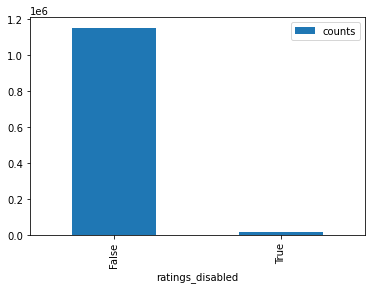

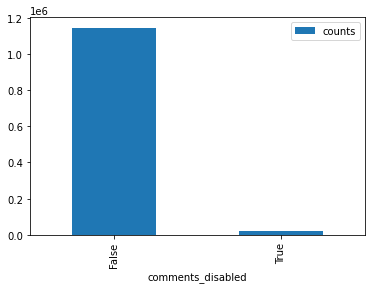

In [11]:
ratings = data[['video_id','ratings_disabled']].groupby(['ratings_disabled']).agg(['count']).droplevel(level=0, axis=1)
ratings.columns = ['counts']
print(ratings,'\n')
print(round((ratings.counts[1]*100)/ratings.counts[0], 4),"% of videos have ratings disabled",'\n'*2)

ratings.plot(kind='bar')
comments = data[['video_id','comments_disabled']].groupby(['comments_disabled']).agg(['count']).droplevel(level=0, axis=1)
comments.columns = ['counts']
print(comments,'\n')
print(round((comments.counts[1]*100)/comments.counts[0], 4),"% of videos have comments disabled")
comments.plot(kind='bar')


In [12]:
#Not Really Of Value in this Exploration
data = data.drop('thumbnail_link', axis=1)

### Adding new varibales related to engagement (Like Ratio, Dislike Ratio, Comment Ratio, Like-Dislike Ratio(LDR))

In [13]:
data['like_ratio'] = round(data['likes']/data['view_count']*100, 4)
data['dislike_ratio'] = round(data['dislikes']/data['view_count']*100, 4)
data['comment_ratio'] = round(data['comment_count']/data['view_count']*100, 4)
data['like_dislike_ratio'] = round((data.likes-data.dislikes)/(data.likes+data.dislikes)*100, 4)
print('Like Ratio, Dislike Ratio, Comment Ratio, Like-Dislike Ratio(LDR) columns have been created!')

Like Ratio, Dislike Ratio, Comment Ratio, Like-Dislike Ratio(LDR) columns have been created!


### Adding Log Elements for Distribution Observations

In [14]:
print('Creating Log Elements for better distribution observations.')
logdata=data.copy()
logdata['likes_log'] = np.log(data['likes'] + 1)
logdata['views_log'] = np.log(data['view_count'] + 1)
logdata['dislikes_log'] = np.log(data['dislikes'] + 1)
logdata['comment_log'] = np.log(data['comment_count'] + 1)
log = logdata[['category', 'country', 'views_log','likes_log','dislikes_log', 'comment_log', 'video_id', 'trending_date', 'channel_title']]
log.dropna(inplace=True)

Creating Log Elements for better distribution observations.


In [15]:
data.shape

(1166710, 23)

# EDA

In [16]:
log.sort_values(by='likes_log')

,category,country,views_log,likes_log,dislikes_log,comment_log,video_id,trending_date,channel_title
754346,People & Blogs,Russia,10.244059,0.000000,0.000000,5.533389,KsFBwyuyABY,2021-03-28,tanya leto
961729,Sports,Japan,14.652986,0.000000,0.000000,9.380336,oMS0sVZpODU,2021-06-17,RIZIN FIGHTING FEDERATION
244569,Entertainment,Mexico,14.063120,0.000000,0.000000,7.521859,xpUQx6d6zPY,2021-11-21,CHAPAPOSTE
961726,Sports,Japan,14.609005,0.000000,0.000000,9.253304,wOirmNoNMHc,2021-06-17,RIZIN FIGHTING FEDERATION
961713,Sports,Japan,13.790857,0.000000,0.000000,8.228177,xPQvMnUmW2Q,2021-06-17,RIZIN FIGHTING FEDERATION
...,...,...,...,...,...,...,...,...,...
433153,Music,Japan,19.470448,16.607888,12.057178,15.741886,WMweEpGlu_U,2021-06-02,HYBE LABELS
488904,Music,South Korea,19.483149,16.610944,12.073712,15.745494,WMweEpGlu_U,2021-06-03,HYBE LABELS
433182,Music,Japan,19.483149,16.610944,12.073712,15.745494,WMweEpGlu_U,2021-06-03,HYBE LABELS
488932,Music,South Korea,19.493985,16.613617,12.091683,15.748954,WMweEpGlu_U,2021-06-03,HYBE LABELS


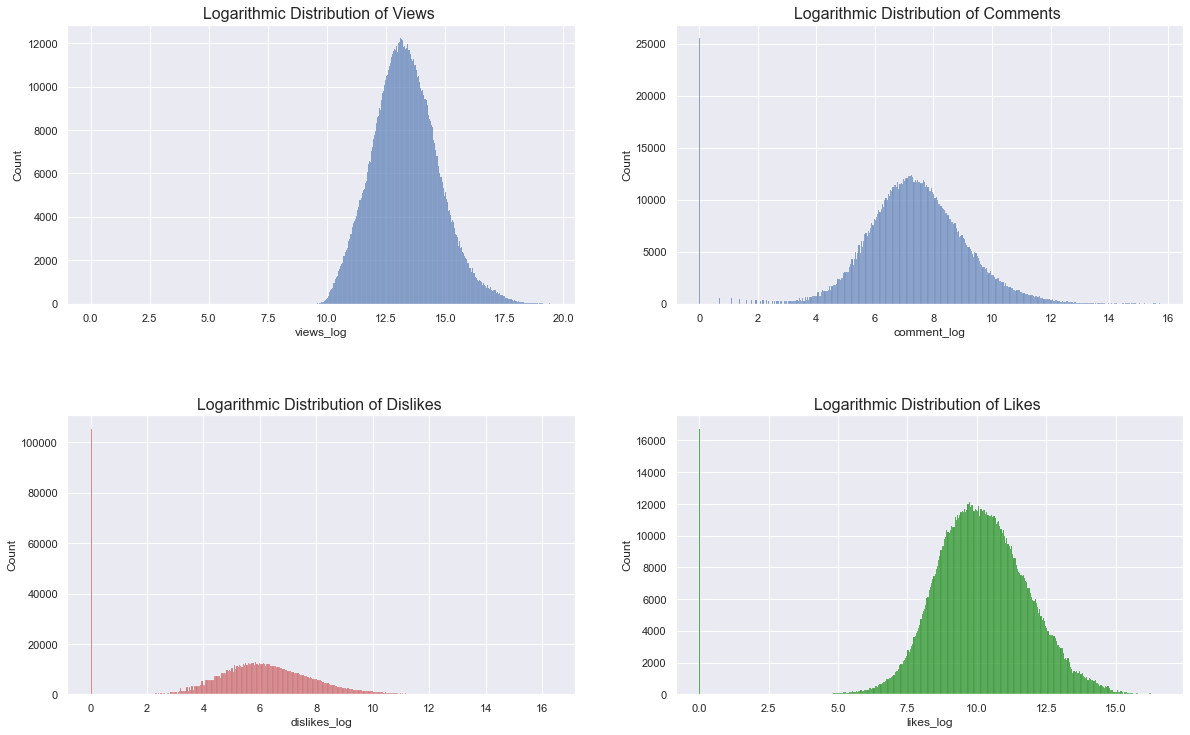

In [18]:
sns.set_theme(style='darkgrid')
plt.figure(figsize = (20,12))

plt.subplot(221)
g1 = sns.histplot(log['views_log'])
g1.set_title("Logarithmic Distribution of Views ", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(log['likes_log'],color='green')
g2.set_title('Logarithmic Distribution of Likes ', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(log['dislikes_log'], color='r')
g3.set_title("Logarithmic Distribution of Dislikes ", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(log['comment_log'])
g4.set_title("Logarithmic Distribution of Comments ", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)


plt.show()

## Back to the main dataframe, let us just take a quick look at the view count's by country

In [19]:
COLOR = 'lightblue'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

Total Video's per Country
United Kingdom    106995
Brazil            106993
France            106991
United States     106991
Japan             106987
Canada            106944
Germany           106943
Mexico            106799
Russia            105839
South Korea       103954
Name: country, dtype: int64


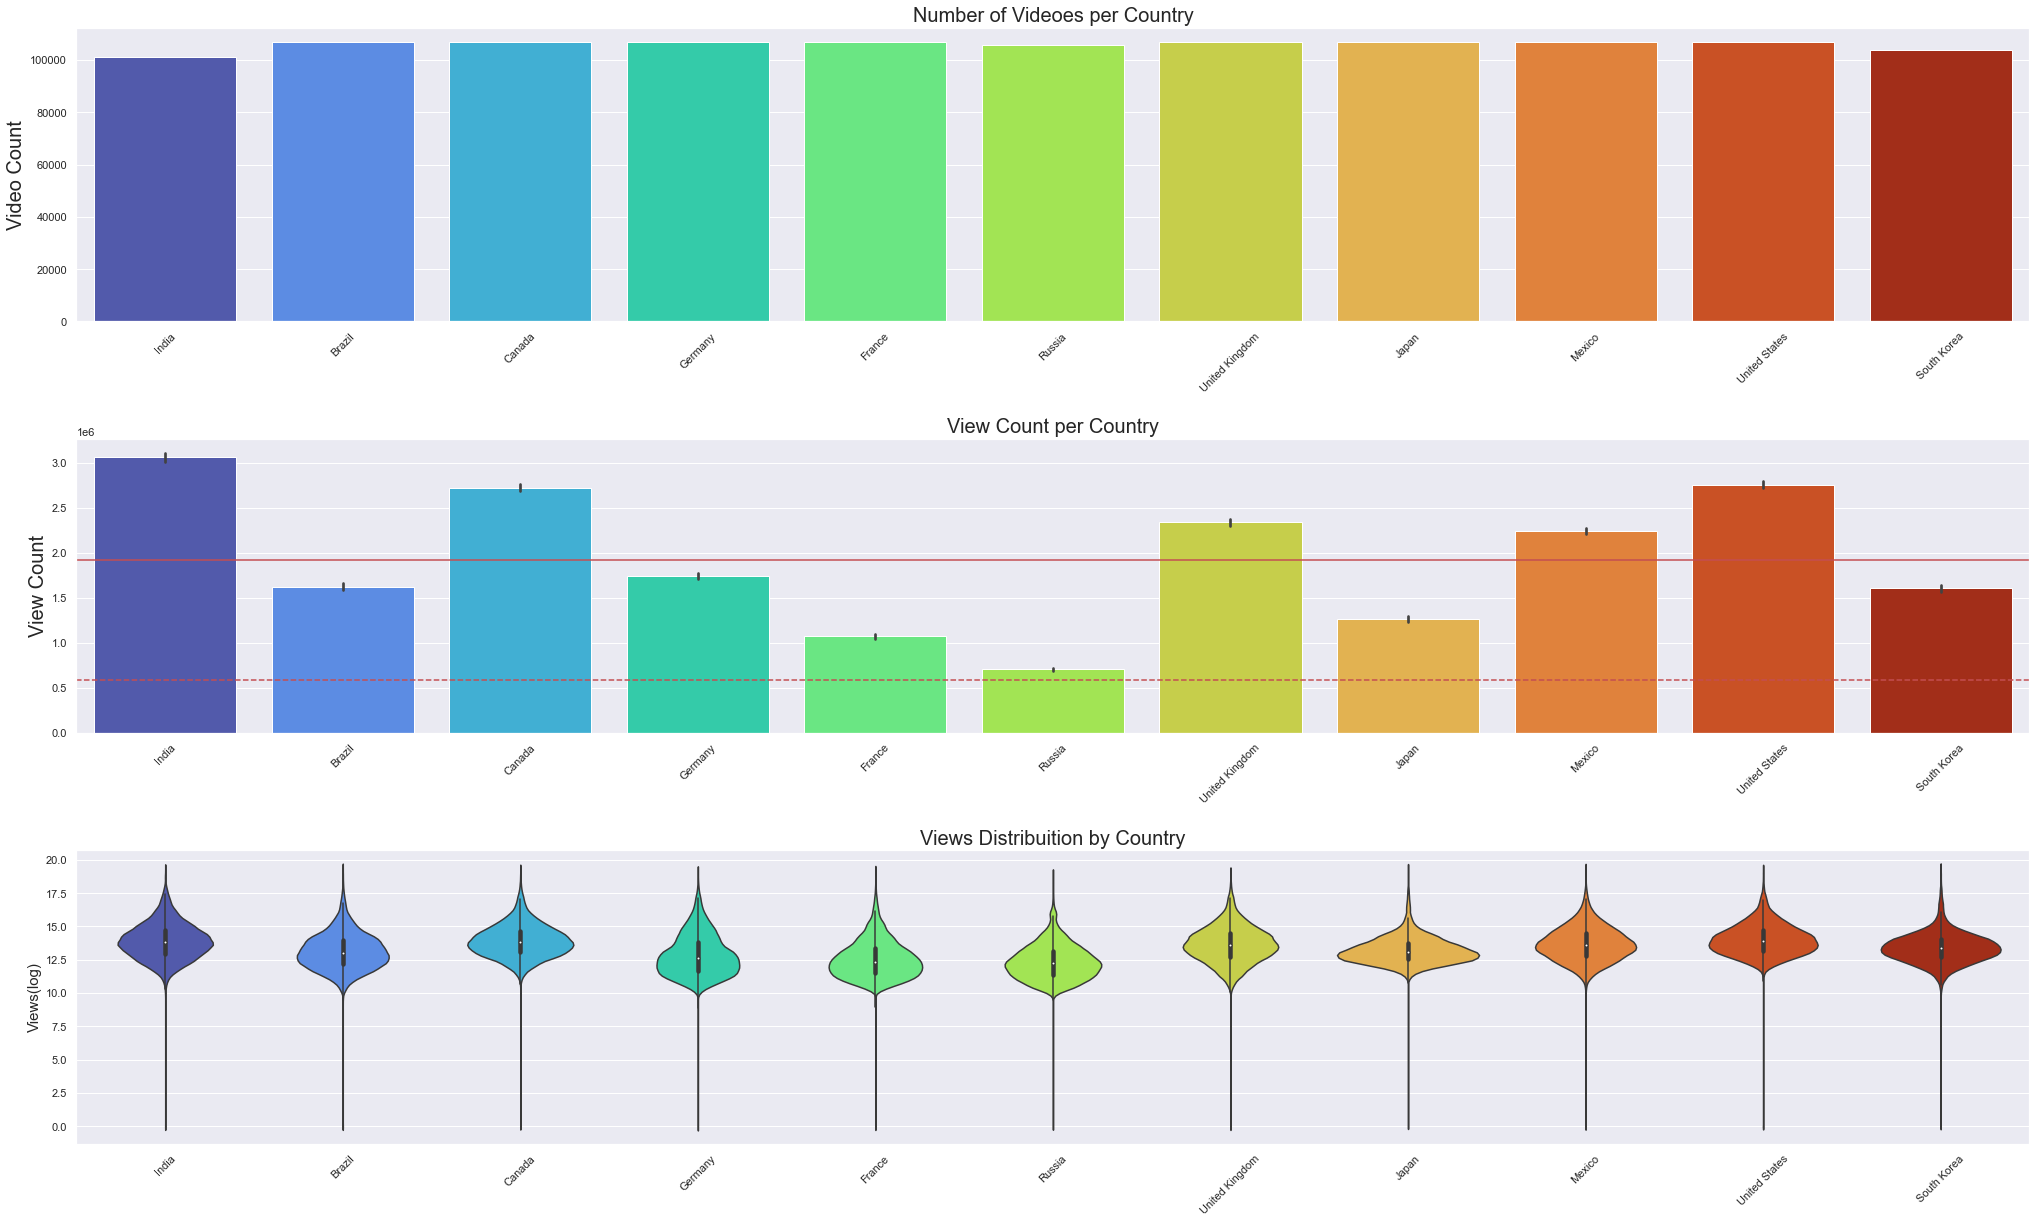

In [20]:
print("Total Video's per Country")
print(data.country.value_counts()[:10])

plt.figure(figsize = (35,20))
sns.set_theme(style='darkgrid')

vc_mean = data.view_count.mean()
vc_median = data.view_count.median()

plt.subplot(311)
g = sns.countplot('country', data=data, palette="turbo")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Number of Videoes per Country", fontsize=20)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Video Count", fontsize=20)

plt.subplot(312)
g1 = sns.barplot(x='country', y='view_count', data=data, palette="turbo")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("View Count per Country", fontsize=20)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("View Count", fontsize=20)
g1.axhline(vc_mean, color='r', linestyle='-')
g1.axhline(vc_median, color='r', linestyle='--')

plt.subplot(313)
g2 = sns.violinplot(x='country', y='views_log', data=logdata, palette="turbo")
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("Views Distribuition by Country", fontsize=20)
g2.set_xlabel("", fontsize=15)
g2.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.4, top = 0.9)

plt.show()

# Visualizing the Data. 

First I want to take a look at how videos trend over time, backed of Views, Likes, Dislikes and Comments. I will be subsetting it into both a Category basis and a Country segment. That way we can see if there is any kind of content that stands above the rest or any country that dominates the content market.

In [35]:
#Grouping into a Category and Country Group
country_vcount = data.groupby(['country','trending_month'])['view_count'].count().reset_index()
cat_vcount = data.groupby(['category','trending_month'])['view_count'].count().reset_index()
video_cat = data.groupby(['category','trending_month'])['view_count','comment_count', 'likes'].sum().reset_index().sort_values(by='trending_month')
video_country = data.groupby(['country','trending_month'])['view_count','comment_count', 'likes'].sum().reset_index().sort_values(by='trending_month')

In [75]:
video_country['total_pos_interactions'] = video_country.view_count+video_country.comment_count+video_country.likes

In [76]:
video_cat.sort_values(by='category')

,category,trending_month,view_count,comment_count,likes
0,Autos & Vehicles,2020-08,4.687683e+08,2173987.0,22887957.0
9,Autos & Vehicles,2021-05,4.983185e+08,3191829.0,28338028.0
3,Autos & Vehicles,2020-11,7.892873e+08,3524990.0,36435876.0
10,Autos & Vehicles,2021-06,2.079712e+09,7612969.0,124471379.0
11,Autos & Vehicles,2021-07,1.090343e+09,2630587.0,44644889.0
...,...,...,...,...,...
249,Travel & Events,2021-11,2.542778e+08,983189.0,13715656.0
235,Travel & Events,2020-09,1.251771e+08,627427.0,7530471.0
242,Travel & Events,2021-04,1.409232e+08,760909.0,8685414.0
241,Travel & Events,2021-03,1.716770e+08,773172.0,10609913.0


In [58]:
''' This is the source code from the RacePlotly Package made for Plotly by Copyright (c) 2020 Luis Chaves Rodriguez. 
I did a little editing to the original code so it could fit my needs for these visualizations. Thank you Mr. Rodgriquez.'''

from random import sample
def title_fixer(columns):
    columns = columns.str.title().str.replace('_', ' ')
    return columns

class racer(object):
    '''
    Class to make bar chart 'race' plots using plotly.
    Arguments:
    * item_column: usually a string denoting the column that you wish to rank (e.g. countries, food, people...)
    * value_column: numerical value
    '''

    def __init__(self, df: pd.DataFrame = None, item_column: str = None, value_column: str = None , time_column: str = None , item_color: str = None , top_entries: int = 12):
        self.df = df
        self.item_column = item_column
        self.value_column = value_column
        self.time_column = time_column
        self.item_color = item_color
        self.top_entries = top_entries
        self.title = ''
        self.fig = None
        self.orientation = None
        self.date_format = None

    def plot(self, title: str = None, orientation: str = 'horizontal', initial_frame = 'min', value_label: str = None, item_label: str = None, time_label: str = 'Date: ', frame_duration: int = 1000, date_format: str = None):
        '''
        By default the time variable is appended to the title string
        * self.orientation: if this is horizontal the value_column is the x-axis, if this is set to
        vertical the value_column is the y_axis
        '''

        self.orientation = orientation # record last self.orientation used
        self.date_format = date_format # record last date_format
        self.title = title

        #get colors
        self.__get_colors()

        # make frame1, the one that appears before the animation playy
        self.__make_frame1(initial_frame)

        # define ui: adds Play,Pause buttons and defines empty slider
        self.__define_ui(time_label)

        # make frames, also updates sliders at each frame
        self.fig['frames'] = self.__make_frames(title, frame_duration)

        # update sliders in layout to sliders_dict with all the steps defined
        self.fig["layout"]["sliders"] = [self.sliders_dict]

        if (item_label is not None) or (value_label is not None):
            if orientation == 'horizontal':
                self.fig.update_xaxes(title_text= value_label,
                        visible = True, showticklabels= True)
                self.fig.update_yaxes(title_text= item_label,
                        visible = True, showticklabels= False)
            else:
                self.fig.update_xaxes(title_text= item_label,
                        visible = True, showticklabels= False)
                self.fig.update_yaxes(title_text= value_label,
                        visible = True, showticklabels= True)

        self.fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = frame_duration
        self.fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = frame_duration

        return self.fig

    def __make_frames(self, title: str, frame_duration: int):
        '''
        bar_race.make_frames automatically makes frame fromt the earliest to the latest available time stamp
        '''

        x, y = self.__check_orientation()
        frames = []
        ## sorted date to iterate through them
        dates = np.sort(self.df[self.time_column].unique())
        for date in dates:

            # specified date string for plotly frame id and for printing in plot
            if isinstance(date, np.datetime64):
                date = pd.to_datetime(str(date))
                try:
                    date_str = date.strftime(format = self.date_format) if self.date_format is not None else str(date)
                except:
                    raise Exception("Something was wrong setting the date_format, please check the strftime (https://strftime.org/) documentation for date formatting and try again")
            else:
                date_str = str(date)

            # filter out by year
            snap_data = self.df[self.df[self.time_column] == date]

            # get_top 10
            snap_data = snap_data.sort_values(self.value_column, ascending=False).iloc[:self.top_entries,:]

            # get top enttry at top of chart
            snap_data = snap_data.sort_values(self.value_column, ascending=True)

            # make frame
            frames.append(
                go.Frame(
                    data=[
                        go.Bar(
                            x=snap_data[x],
                            y=snap_data[y],
                            marker_color=snap_data['color'],
                            cliponaxis=False,
                            hoverinfo='all',
                            hovertemplate = '<extra></extra>', #annoying and obscure, see docs
                            ## (https://community.plotly.com/t/remove-trace-0-next-to-hover/33731)
                            textposition='outside',
                            texttemplate='%{x}<br>%{y:.4s}' if self.orientation == 'vertical' else '%{y}<br>%{x:.4s}',
                            textangle = 0,
                            orientation = 'h' if self.orientation == 'horizontal' else 'v'
                        )
                    ],
                    layout=go.Layout(
                        font=fontdict1,
                        title_font=fontdict2,
                        title_x=0.5,
                        plot_bgcolor = 'black',
                        xaxis={
                            'showline': False,
                            'visible': True
                        } if self.orientation == 'vertical' else
                        {
                            'showline': True,
                            'visible': True,
                            'range': (0, self.df[self.value_column].max())
                        },
                        yaxis={
                            'showline': True,
                            'visible': True,
                            'range': (0, self.df[self.value_column].max())
                        } if self.orientation == 'vertical' else
                        {
                            'showline': False,
                            'visible': True
                        },
                        bargap=0.15,
                        title= title
                    ),
                    name = date_str
                )
            )

            slider_step = {"args": [
                [date_str],
                {"frame": {"duration": frame_duration, "redraw": False},
                 "mode": "immediate",
                 "transition": {"duration": frame_duration}}
            ],
                           "label": date_str,
                           "method": "animate"}
            self.sliders_dict["steps"].append(slider_step)


        return frames

    def __make_frame1(self, time_frame1 = 'min'):
        """
        Internal use
        time_frame1 can be a number that equals one of the entries in the time column
        or key values such as 'min' or 'max'
        """

        if time_frame1 == 'min':
            time_frame1 = self.df[self.time_column].min()
        elif time_frame1 == 'max':
            time_frame1 = self.df[self.time_column].max()

        # filter by year
        frame1 = self.df[self.df[self.time_column] == time_frame1]

        # get top entries
        frame1  = frame1.sort_values(self.value_column, ascending=False).iloc[:self.top_entries,:]

        # return in ascending order so that top bar corresponds to largest value
        frame1 = frame1.sort_values(self.value_column, ascending=True)

        x, y = self.__check_orientation()

        # Create figure
        self.fig = go.Figure(
            data=[
                go.Bar(
                    x=frame1[x],
                    y=frame1[y],
                    marker_color=frame1['color'],
                    hoverinfo='all',
                    textposition='outside',
                    texttemplate='%{x}<br>%{y:.4s}' if self.orientation == 'vertical' else '%{y}<br>%{x:.4s}',
                    textangle= 0,
                    cliponaxis=False,
                    orientation = 'h' if self.orientation == 'horizontal' else 'v'
                )
            ],
            layout=go.Layout(
                font=fontdict1,
                title_font=fontdict2,
                title_x = 0.5,
                plot_bgcolor = 'black',
                height = 800,
                xaxis={
                    'showline': False,
                    'visible': False
                } if self.orientation == 'vertical' else
                {
                    'showline': True,
                    'visible': True,
                    'range': (0, self.df[self.value_column].max())
                },
                yaxis={
                    'showline': True,
                    'visible': True,
                    'range': (0, self.df[self.value_column].max())
                } if self.orientation == 'vertical' else
                {
                    'showline': False,
                    'visible': False
                },
                bargap=0.15,
                title= self.title
            ),
            frames = []
        )


    def __check_orientation(self):

        if self.orientation == 'horizontal':
            x = self.value_column
            y = self.item_column
        elif self.orientation == 'vertical':
            y = self.value_column
            x = self.item_column
        else:
            raise Exception('Please provide a valid value for orientation: horizontal or vertical')

        return x, y

    def __define_ui(self, time_label: str = None):

        self.fig["layout"]["updatemenus"] = [
            {
                "buttons": [
                    {
                        "args": [None, {"frame": {"duration": 1000, "redraw": False},
                                        "fromcurrent": True, "transition": {"duration": 1,
                                                                            "easing": "quadratic-in-out"}}],
                        "label": "Play",
                        "method": "animate"
                    },
                    {
                        "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                          "mode": "immediate",
                                          "transition": {"duration": 0}}],
                        "label": "Pause",
                        "method": "animate"
                    }
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 87},
                "showactive": False,
                "type": "buttons",
                "x": 0.1,
                "xanchor": "right",
                "y": 0,
                "yanchor": "top"
            }
        ]

        self.sliders_dict = {
            "active": 0,
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {
                "font": {"size": 20},
                "prefix": time_label,
                "visible": True,
                "xanchor": "right"
            },
            "transition": {"duration": 300, "easing": "cubic-in-out"},
            "pad": {"b": 10, "t": 50},
            "len": 0.9,
            "x": 0.1,
            "y": 0,
            "steps": [] # empty, gets filled when frames are made
        }


    def __get_colors(self):
        if (self.item_color == None):
            colors = {item: 'rgb({}, {}, {})'.format(*sample(range(256), 3)) for item in self.df[self.item_column].unique()}
            self.df['color'] = self.df[self.item_column].map(colors)
        elif (self.item_color != None and len(self.item_color) != self.df[self.item_column].nunique()):
            for item in self.df[self.item_column].unique():
                if item not in self.item_color.keys():
                    self.item_color[item] = 'rgb({}, {}, {})'.format(*sample(range(256), 3))
            self.df['color'] = self.df[self.item_column].map(self.item_color)
        else:
            self.df=self.df.rename(columns={self.item_color: "color"})

In [59]:
colors = {'Autos & Vehicles': 'rgb(255, 204, 204)',
          'Comedy': 'rgb(255, 204, 153)',
          'Entertainment': 'rgb(255, 255, 104)',
          'Film & Animation':'rgb(153, 255, 51)',
          'Gaming':'rgb(0, 255, 0)',
          'Howto & Style':'rgb(76, 0, 153)',
          'Music':'rgb(0, 255, 255)',
          'News & Politics':'rgb(255,0,255)',
          'People & Blogs': 'rgb(208, 210, 211)',
          'Sports':'rgb(0,128,128)',
          'Education':'rgba(128,128,0)',
          'Science & Technology':'rgb(127,255,0)',
          'Travel & Events':'rgb(153, 153, 255)',
          'Pets & Animals':'rgb(255,255,0)'}

In [60]:
my_raceplot = racer(racer1, item_column='category', value_column='view_count', time_column='trending_month')
my_raceplot.plot(title='Total Views By Category - Past 18 Months',
                 item_label = 'Category',
                 value_label = 'Views on Trending Videos',
                 frame_duration = 1200,
                 date_format = '%B, %Y')


In [61]:
racer2 = video_cat[['category', 'likes', 'trending_month']]
my_raceplot = racer(racer2, item_column='category', value_column='likes', time_column='trending_month')
my_raceplot.plot(title='Total Likes By Category - Past 18 Months',
                 item_label = 'Category',
                 value_label = 'Likes on Trending Videos',
                 frame_duration = 1200,
                 date_format = '%B, %Y')


In [62]:
my_raceplot = racer(racer3, item_column='category', value_column='comment_count', time_column='trending_month')
my_raceplot.plot(title='Total Comments By Category - Past 18 Months',
                 item_label = 'Category',
                 value_label = 'Comments on Trending Videos',
                 frame_duration = 1200,
                 date_format = '%B, %Y')

In [63]:
racer4= cat_vcount

my_raceplot = racer(racer4, item_column='category', value_column='view_count', time_column='trending_month')
my_raceplot.plot(title='Count of Trending Views By Category',
                 item_label = 'Category',
                 value_label = 'Trending Videos',
                 frame_duration = 800,
                 date_format = '%Y-%m-')


### Analysis
It is interesting to see that Music dominates in term of engagment metrics such as Likes, Views, amd Comments. However when you see the total trending videos each category has by month, Entertainment content has more trending videos and even more recently Gaming and People/Blogs. 

Music Content must be recieving a magnitude higher in per-capita interactions than one would even suspect after seeing the first three animations considering it has not led the pack with most trending videos in the past 18 months.
***

# Country Based Trends - Past 18 Months

In [64]:
my_raceplot = racer(video_country, item_column= 'country', value_column='view_count', time_column='trending_month')
my_raceplot.plot(title='Total View Count Per Country - Past 18 Months',
                 item_label = 'Country',
                 value_label = 'Total Views Count on Trending Videos',
                 frame_duration = 1200,
                 date_format = '%B, %Y')

In [69]:
my_raceplot

In [70]:
my_raceplot = racer(video_country, item_column= 'country', value_column='likes', time_column='trending_month')
my_raceplot.plot(title='Total Likes Per Country - Past 18 Months',
                 item_label = 'Country',
                 value_label = 'Total Likes on Trending Videos',
                 frame_duration = 1200,
                 date_format = '%B, %Y')


In [71]:
my_raceplot = racer(video_country, item_column= 'country', value_column='comment_count', time_column='trending_month')
my_raceplot.plot(title='Total Comments Per Country - Past 18 Months',
                 item_label = 'Country',
                 value_label = 'Comments on Trending Videos',
                 frame_duration = 1200,
                 date_format = '%B, %Y')


In [72]:
my_raceplot = racer(country_vcount, item_column='country', value_column='view_count', time_column='trending_month')
my_raceplot.plot(title='Count of Trending Views By Country',
                 item_label = 'Country',
                 value_label = 'Count of Trending Videos',
                 frame_duration = 1200,
                 date_format = '%Y-%m-')

In [79]:
my_raceplot = racer(video_country, item_column='country', value_column='total_pos_interactions', time_column='trending_month')
my_raceplot.plot(title='Total Interactions By Coutry - Past 18 Months',
                 item_label = 'Category',
                 value_label = 'Comments on Trending Videos',
                 frame_duration = 1200,
                 date_format = '%B, %Y')

## Analysis Countries:
So with this the total trending video's each month by country is honeslty a bit irrelevant aside from the fact that there is a baseline of how many video's each country has in the mix due to this data coming from each country Youtube API. North America definitely is the most engaged of all the conitinents which is not to suprising since Youtube is from the USA originally. It is a bit suprising that India was not leading the pack due there massive population and also having a the most subscribed to channel on youtube (T-Series) which at the time of this project has about double the subscribers of Cocomelon(USA) and SET(India) which are the second and third.
[Most Subscribed Channels]('https://en.wikipedia.org/wiki/List_of_most-subscribed_YouTube_channels', 'Pewds Is Still King')
***

# Category Preference by Country
I believe to find the preference we will need to look at the view count, LDR, like ratio and dislike ratio to get a more accurate understanding of how content does in each country

In [150]:
# Group by Country Category and Metrics
circle = data.groupby(['country','category']).mean()[['view_count', 'like_dislike_ratio', 'like_ratio', 'dislike_ratio']].reset_index()
labels = circle.index

In [151]:
circle.head(100)

,country,category,view_count,like_dislike_ratio,like_ratio,dislike_ratio
0,Brazil,Autos & Vehicles,3.386709e+05,96.823746,10.926037,0.115850
1,Brazil,Comedy,9.372163e+05,96.097828,10.935783,0.158027
2,Brazil,Education,2.869042e+05,92.058743,9.848461,0.250828
3,Brazil,Entertainment,1.108874e+06,96.533780,10.947435,0.140725
4,Brazil,Film & Animation,1.488048e+06,96.513666,7.934869,0.099482
5,Brazil,Gaming,1.554930e+06,96.708033,9.687078,0.135377
6,Brazil,Howto & Style,6.771087e+05,96.683248,11.700904,0.138975
7,Brazil,Music,3.372345e+06,96.862508,NaN,NaN
8,Brazil,News & Politics,5.698950e+05,87.407151,3.619430,0.274038
9,Brazil,People & Blogs,9.530037e+05,96.847036,11.692251,0.145831


In [158]:
colors = {'Autos & Vehicles': 'silver',
          'Comedy': 'yellow',
          'Entertainment': 'orange',
          'Film & Animation':'lightsalmon',
          'Gaming':'purple',
          'Howto & Style':'red',
          'Music':'lightgreen',
          'News & Politics':'olive',
          'People & Blogs': 'navajowhite',
          'Sports':'dodgerblue',
          'Education':'cyan',
          'Science & Technology':'navy',
          'Travel & Events':'deeppink',
          'Pets & Animals':'brown'}

fig1 = px.treemap(circle, path=['country','category'], values='view_count',
                  color='category', hover_data=['view_count'],
                  color_discrete_map=colors)

fig1.update_layout(title='Most Viewed Content by Country', font=fontdict,
                   title_x=0.45, title_y=0.97, title_font_size=35,margin = dict(t=50, l=25, r=25, b=25))

fig1.show()

fig2 = px.treemap(circle, path=[ 'country','category'], values='like_dislike_ratio',
                  color='category', hover_data=['like_dislike_ratio'],
                  color_discrete_map=colors)

fig2.update_layout(title='Highest LDR Content by Country', font=fontdict,
                   title_x=0.45, title_y=0.97, title_font_size=35,margin = dict(t=50, l=25, r=25, b=25))

fig2.show()

fig3 = px.treemap(circle, path=['country','category'], values='like_ratio',
                  color='category', hover_data=['like_ratio'],
                  color_discrete_map=colors)

fig3.update_layout(title='Most Liked Content by Country', font=fontdict,
                   title_x=0.45, title_y=0.97, title_font_size=35,margin = dict(t=50, l=25, r=25, b=25))

fig3.show()

fig4 = px.treemap(circle, path=['country','category'], values='dislike_ratio',
                  color='category', hover_data=['dislike_ratio'],
                  color_discrete_map=colors)

fig4.update_layout(title='Most Disliked Content by Country', font=fontdict,
                   title_x=0.45, title_y=0.97, title_font_size=35,margin = dict(t=50, l=25, r=25, b=25))

fig4.show()

## Analysis:
It is definiely interesting to see the differences in various counrties. Pets & Animals, Travel, Music, Gaming and Comedy were the releatively consistent in term of postivie metrics. News & Politics was cleary the most unpopular of all content though, which is probably of little suprise since those are polarizing subjects. However I did find it interesting that Russia and South Korea seems to have a problem with comedic content in comparison to the rest of the countries.
***

# Top Channels and Trending Days

In [164]:
# Grouping and counting days a video was trending 
trending_days = data.groupby(['video_id', 'country', 'channel_title'])['video_id'].count().reset_index(name='days_trending').sort_values(by='days_trending')

In [165]:
rdata = data.copy()
rdata = rdata.sort_values(by='trending_date').drop_duplicates('video_id',keep='last').dropna()

trend_days = rdata.merge(trending_days, how='left', on='video_id').sort_values(by='days_trending')

cols=[2,4,6,11,12,13,18,23,24]
trend_days.drop(trend_days.columns[cols], axis=1, inplace=True)

trend_days.rename(columns={'channel_title_x':'channel_title', 'country_x':'country'}, inplace=True)

In [166]:
catmerge = trend_days[['channel_title', 'category','country']]
trending_channel=trend_days.groupby(by=['channel_title'],as_index=False).agg({'days_trending':'sum','view_count':'sum','likes':'sum','dislikes':'sum','comment_count':'sum','like_ratio':'mean', 'dislike_ratio':'mean', 'comment_ratio':'mean', 'like_dislike_ratio':'mean'}).sort_values(by='view_count',ascending=False).head(100)
trending_channel = trending_channel.merge(catmerge, how='left', on='channel_title').drop_duplicates('channel_title', keep='first')

In [167]:
trending_channel.days_trending = trending_channel.days_trending.astype(float)
trending_channel.country.value_counts()
def mask_country(row):
    if row['country'] == 'India':
        return 1
    elif row['country'] == 'United States':
        return 2
    elif row['country'] == 'Mexico':
        return 3
    elif row['country'] == 'Russia':
        return 4
    elif row['country'] == 'Germany':
        return 5
    elif row['country'] == 'Brazil':
        return 6
    elif row['country'] == 'France':
        return 7
    elif row['country'] == 'United Kingdom':
        return 8
    elif row['country'] == 'Canada':
        return 9
    elif row['country'] == 'Japan':
        return 10
    elif row['country'] == 'South Korea':
        return 11
    else:
        return 0
trending_channel['country_num'] = trending_channel.apply(mask_country, axis=1).astype(float)

In [168]:
def facetting_scatter_plot(trending_channel, n_cols=3, x='days_trending'):
    numeric_cols = trending_channel.select_dtypes('number').columns[1:10]
    n_rows = -(-len(numeric_cols) // n_cols)  # math.ceil in a fast way, without import
    row_pos, col_pos = 1, 0
    fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=title_fixer(numeric_cols))

    for col in numeric_cols:
        # trace extracted from the fig
        trace = px.scatter(trending_channel, x=x, y=col, trendline='ols', color='country_num', hover_name='country',
                           color_discrete_sequence= px.colors.sequential.Plasma_r, trendline_color_override='#DC143C')["data"]
        # auto selecting a position of the grid
        if col_pos == n_cols: row_pos += 1
        col_pos = col_pos + 1 if (col_pos < n_cols) else 1
        # adding trace to the grid
        fig.add_trace(trace[0], row=row_pos, col=col_pos)
        fig.add_trace(trace[1], row=row_pos, col=col_pos)
        
        
    return fig

fig = facetting_scatter_plot(trending_channel)
# final tweaks
fig.update_layout(height=1000, font=fontdict1, title='Relationship of Days Trending with other Metrics', title_font=fontdict2, title_x=0.5)
fig.show()

## Analysis:
It appears that the only thing that starts to decline is a video's Dislike Ration on Average, this would makes sense sense most videos that trend for positive reasons

# Correlation

In [170]:
datacorr = data.drop('description', axis=1)

In [172]:
corr = round(data.corr(),4)
dcorr = corr.iloc[1]
dcdf = pd.DataFrame(dcorr)
print(dcdf.sort_values(by='view_count', ascending=False
                      ))

mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)

fig = ff.create_annotated_heatmap(z=df_mask.to_numpy(), 
                                  x=df_mask.columns.tolist(),
                                  y=df_mask.columns.tolist(),
                                  colorscale=px.colors.sequential.Sunset,
                                  showscale=True, ygap=1, xgap=1
                                 ).update_layout(font=fontdict, title_x=0.45, title_font_size=35)

fig.update_xaxes(side="bottom")

fig.update_layout(
    font = fontdict,
    title_text='Correlations',
    title_font_size=35,
    title_x=0.5, 
    height=1000,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_dark'
)

# NaN values are not handled automatically and are displayed in the figure
# So we need to get rid of the text manually
for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

                    view_count
view_count              1.0000
likes                   0.8595
comment_count           0.6607
dislikes                0.2465
comment_ratio           0.0290
like_dislike_ratio      0.0098
dislike_ratio          -0.0044
like_ratio             -0.0120
category_id            -0.0897


In [173]:
corrdata = data[['category_id', 'view_count', 'likes', 'dislikes', 'comment_count', 'like_ratio', 'dislike_ratio', 'comment_ratio', 'like_dislike_ratio']]

In [174]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(corrdata, 10))

Top Absolute Correlations
view_count     likes                 0.859537
likes          comment_count         0.761297
view_count     comment_count         0.660663
dislike_ratio  like_dislike_ratio    0.596474
like_ratio     comment_ratio         0.404537
dislikes       dislike_ratio         0.286133
like_ratio     like_dislike_ratio    0.280889
view_count     dislikes              0.246545
likes          dislikes              0.209644
dislikes       comment_count         0.208196
dtype: float64


## Analysis:
Likes, Comments and Dislike are cleary the meterics that matter the most when it comes to views, however I am a bit more intriqued of how much people actually enjoy the content. I think the metrics like comment ratio and like-dislike ratio show a stronger overall picture of how people recived the video.
***

# Rating, Score, Ranking
## Rating:
- **Comment-weighted ER (Engagement Rating)** = (Total comments x 2) + all other engagements / Views per Video *100
- **Like-Dislike Ratio Rating**
## Score:
**Will Be V = Views, M = Minumimun Comments Allowed, R = Like-Dislike Ratio and C = Mean View Count

$$
WeightedRating(WR)=(\frac{v}{v+m}R)+(\frac{m}{v+m}C)
$$

In [179]:
C = data['like_dislike_ratio'].mean()

print('The Mean Like Dislike Ratio is:',C)

The Mean Like Dislike Ratio is: 93.99916289657808


In [180]:
m= data['comment_count'].quantile(0.55)
print('The Minimum Comments Allowed is:',m)

c= data['view_count'].quantile(0.55)
print('The Minimum Views Allowed is:',c)

l= data['likes'].quantile(0.25)
print('The Minimum Likes Allowed is:',l)


The Minimum Comments Allowed is: 1923.0
The Minimum Views Allowed is: 690362.8
The Minimum Likes Allowed is: 8754.0


In [181]:
#Remove the Minimum allowed Comments, Views, and Likes
#I will just remove videos that have 0 likes because that would skew the data with Outliers
vids = data.copy().loc[data['comment_count'] >= m]
vids = vids.loc[vids['view_count'] >= c]
vids = vids.loc[vids['likes'] >= l]
vids = vids.loc[vids['dislikes'] >= 1]
print("New DF shape:", vids.shape)
print("Original DF shape", data.shape)

New DF shape: (355625, 23)
Original DF shape (1115517, 23)


In [182]:
#Define Weighted Rating Function
def score_vids(x, c=c, C=C):
    v = x['view_count']
    R = x['like_dislike_ratio']
   
    return round((v/(v+c) * R) + (c/(c+v) * C),4)

In [183]:
#Apply Weighted Rating and create new column called 'Score'
#vids.insert(loc = 2,column = 'score', value = '')
vids['score'] = vids.apply(score_vids, axis=1)

In [217]:
vids = vids.sort_values('trending_date').drop_duplicates('title',keep='last')

vids = vids.sort_values('score', ascending=False)

#Print the top and bottom 5 videos
vids[['title', 'channel_title', 'view_count', 'like_dislike_ratio', 'likes', 'dislikes', 'score']].head(20)
usa= vids[vids['country']=='United States']
usa['score'] = vids.apply(score_vids, axis=1)
usa = usa.sort_values('score', ascending=False)
bstwstct = vids[['channel_title','title','score', 'view_count', 'like_dislike_ratio', 'likes', 'dislikes']].iloc[np.r_[0:9, -9:0]]

bstwstct.columns = title_fixer(bstwstct.columns)
bstwstct['Title']= bstwstct['Title'].str.replace(r"\(.*\)","").str.replace(r"\[.*\]","").str.replace(r"\'.*\''","").str[:15]

In [218]:
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

fig =  ff.create_table(bstwstct, colorscale=colorscale)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 10
print('Top 10 and Bottom 10 Channels by Weighted Engagement Rankings')
fig.show()

Top 10 and Bottom 10 Channels by Weighted Engagement Rankings


In [185]:
#Create Groupby Objects to Aggreating the Mean for Country and Category
ccagg = vids.groupby(['category', 'country']).agg({'view_count':'mean','dislikes':'mean','likes':'mean','comment_count':'mean', 'like_dislike_ratio':'mean'}).round(2).reset_index()

#Create a country and category specific groupby so we can create an 'All' row in master aggreation dataframe
category_agg =vids.groupby(['category'])[['view_count','dislikes','likes','comment_count','like_dislike_ratio']].agg(np.mean).round(2).reset_index()
country_agg = vids.groupby(['country'])[['view_count','dislikes','likes','comment_count','like_dislike_ratio']].agg(np.mean).round(2).reset_index()
country_agg['category']= 'All'
category_agg['country']= 'All'

#Ensuring the frames will match up accordingly
category_agg=category_agg[['category', 'country', 'view_count', 'dislikes', 'likes', 'comment_count', 'like_dislike_ratio']]
country_agg=country_agg[['category', 'country', 'view_count', 'dislikes', 'likes', 'comment_count', 'like_dislike_ratio']]

#Concat the frames into master and create our scoring column
master_agg = pd.concat([category_agg, country_agg,ccagg])
master_agg.insert(loc = 2,column = 'score', value = '')

In [186]:
def title_fixer(columns):
    columns = columns.str.title().str.replace('_', ' ')
    return columns

In [194]:
#Run our score methond
master_agg['score'] = master_agg.apply(score_vids, axis=1)

#Sort by score
master_agg = master_agg.sort_values('score', ascending=False).reset_index(drop=True)

#Print the top 10 and bottom 10 Categories/Countries
best_worstcc = master_agg.iloc[np.r_[0:9, -9:0]]


best_worstcc.columns = title_fixer(best_worstcc.columns)


colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

fig =  ff.create_table(best_worstcc, colorscale=colorscale)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 10
print('Top 10 and Bottom 10 Category/Country Combo by Weighted Engagement Rankings')
fig.show()

Top 10 and Bottom 10 Category/Country Combo by Weighted Engagement Rankings


In [219]:
#Find Top 1000 Videos by Country
topvids = vids.head(1000)
country_count = topvids.value_counts('country').reset_index().rename(columns={0:'Video Count'})
figt = px.bar(country_count, x='country', y='Video Count', color='country', hover_name='Video Count')
figt.update_layout(title='Video Count in Top 1000 by Country',font=fontdict, title_x=0.45, title_font_size=35,
                  xaxis_title="Country", yaxis_title="Video Count", legend_title="Country")

#Find Bottom 1000 Videos by Country
bttmvids = vids.tail(1000)
country_count_btm = bttmvids.value_counts('country').reset_index().rename(columns={0:'Video Count'})
figb = px.bar(country_count_btm, x='country', y='Video Count', color='country', hover_name='Video Count')
figb.update_layout(title='Video Count in Bottom 1000 by Country',font=fontdict, title_x=0.45, title_font_size=35,
                  xaxis_title="Country", yaxis_title="Video Count", legend_title="Country")

figt.show()
figb.show()

### Sorry to Russia but well done to South Korea. As for the USA, Im not to suprised that we hold up in both the top of the list and the bottom.

In [282]:
chan_cat= vids[['channel_title', 'category']].head(1000)

In [284]:
channel_count.merge(chan_cat, on='channel_title').drop_duplicates()

,channel_title,Video Count,category
0,BANGTANTV,133,Music
133,SQUEEZIE,35,Entertainment
168,HYBE LABELS,24,Music
192,SMTOWN,21,Music
213,Stray Kids,15,People & Blogs
...,...,...,...
984,Fede Vigevani,1,Entertainment
985,FMK,1,Music
986,FILA KOREA,1,Entertainment
987,SZA,1,Music


In [361]:
#Find Top 1000 Videos by Creator
cat_topvids = vids.head(1000)
channel_count = cat_topvids.value_counts('channel_title').reset_index().rename(columns={0:'Video Count'})
channel_count.channel_title[9] ='Tonight Show'
channel_count= channel_count.merge(chan_cat, on='channel_title').drop_duplicates()
channel_count.drop([267],inplace=True)
figtcat = px.bar(channel_count.head(15), x='channel_title', y='Video Count', color='channel_title', hover_name='Video Count', hover_data=['category', 'channel_title'])
figtcat.update_layout(title='Video Count in Top 1000 by Creators',font=fontdict, title_x=0.5, title_font_size=35,
                  xaxis_title="Channel Title", yaxis_title="Video Count", legend_title="Creators")

#Find Bottom 1000 Videos by Category
#Find Top 1000 Videos by Creator
usa_topvids = usa.head(100)
usa_count = usa_topvids.value_counts('channel_title').reset_index().rename(columns={0:'Video Count'})
usa_count= usa_count.merge(chan_cat, on='channel_title').drop_duplicates()
usa_count.drop([0,58], inplace=True)
figbcat = px.bar(usa_count.head(15), x='channel_title', y='Video Count', color='channel_title', hover_name='Video Count', hover_data=['category', 'channel_title'])
figbcat.update_layout(title='Video Count in Top 1000 by Creators USA',font=fontdict, title_x=0.5, title_font_size=35,
                  xaxis_title="Channel Title", yaxis_title="Video Count", legend_title="Creators")
figtcat.show()
figbcat.show()

In [292]:
ctest=cat_topvids.groupby(['category', 'country'])['score'].count().reset_index()
ctest2=cat_topvids.groupby(['country','category'])['score'].count().reset_index()

In [295]:
ctest.columns = ['Category','Country', 'Top Videos']
ctest2.columns = ['Country','Category', 'Top Videos']

In [314]:
levels = ['Category','Country'] # levels used for the hierarchical chart
value_column = 'Top Videos'
levels2 = ['Country','Category'] # levels used for the hierarchical chart
value_column2 = 'Top Videos'
def build_hierarchical_dataframe(df, levels, value_column, title):
    """
    Build a hierarchy of levels for Sunburst or Treemap charts.

    Levels are given starting from the bottom to the top of the hierarchy,
    ie the last level corresponds to the root.
    """
    df_all_trees = pd.DataFrame(columns=['id', 'parent', 'value'])
    for i, level in enumerate(levels):
        df_tree = pd.DataFrame(columns=['id', 'parent', 'value'])
        dfg = ctest.groupby(levels[i:]).sum()
        dfg = dfg.reset_index()
        df_tree['id'] = dfg[level].copy()
        if i < len(levels) - 1:
            df_tree['parent'] = dfg[levels[i+1]].copy()
        else:
            df_tree['parent'] = title
        df_tree['value'] = dfg[value_column]
        df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
    total = pd.Series(dict(id=title, parent='',
                              value=df[value_column].sum()))
    df_all_trees = df_all_trees.append(total, ignore_index=True)
    return df_all_trees


country_cat = build_hierarchical_dataframe(ctest, levels, value_column, title='Country')
cat_country = build_hierarchical_dataframe(ctest2, levels2, value_column2, title='Category')


In [317]:
fig = make_subplots(
    1, 2, specs=[[{"type": "domain"}, {"type": "domain"}]])

fig.add_trace(go.Treemap(
    labels=country_cat['id'],
    parents=country_cat['parent'],
    values=country_cat['value'],
    textinfo = "label+value",
    branchvalues='total',
    insidetextfont =dict(family='Courier New'),
    hovertemplate='<b> %{label} </b> <br> Top 1000 Videos: %{value}',
    name='',
    maxdepth=2, 
    meta=dict(title='Country Breakdown')
    ), 1, 1)

fig.add_trace(go.Treemap(
    labels=cat_country['id'],
    parents=cat_country['parent'],
    values=cat_country['value'],
    textinfo = "label+value",
    branchvalues='total',
    insidetextfont =dict(family='Courier New'),
    hovertemplate='<b>%{label} </b> <br> Top 1000 Videos: %{value}',
    name='',
    maxdepth=2
    ), 1, 2)

fig.update_layout(title='Top 1000 Trending Videos', font=fontdict, title_x=0.5, title_font=dict(family='Courier New', size=45, color='lightblue'), height=800, uniformtext=dict(minsize=20, mode='hide'))
fig.show()

# Conclusion
   Music always seem to be the driving factor and entertainment. It was without question views I had any other categories throughout analysis. And it seems to just stay at the top of the mountain. However it was surprising to find that videos that tend to be more likely preferred were Pet, Gaming and Comedy oriented videos as well. While I think it is not a revelation to anyone that News & Politics gets the most negative engagement out of all the categories. 

   As for countries, South Korea has the most positive minded viewers, with not much criticism. Russia, while it may still have had a much greater frequency of positive interactions than negative, its per capita metrics were a bit behind that of the other countries.
   
  ### Top 5 Rated Videos World Wide of the past 18 months are:
   1. Hyundai x BTS | For tomorrow BY       : **HyundaiWorldwide - South Korea**
   2. Free Fire Asia Championship Finals BY : **Free Fire Esports - India**
   3. BTS (방탄소년단) BTS ROOM LIVE BY        : **BANGTANTV - Brazil** 
   4. RM - Bicycle #2021BTSFESTA : **BANGTANTV -	Mexico**
   5. BTS (방탄소년단) 'N.O' Dance :	**BANGTANTV	- Mexico**
   

 ### Bottom 5 Rated Videos : Past 18 Months:
  1. Sadak 2 | Official Trailer : **FoxStarHindi -	India**
  2. Beyonce Sharma Jayegi : **Khaali Peeli : Zee Music CompanY - India**
  3. Khaali Peeli | Teaser | : **Zee Studios  -  India**
  4. Cuties | Official Trailer : **Netflix	 - Russia & USA**
  5. Tehas Nehas : Khaali PeeliZee **Music Company -India**